In [1]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 9

/home/michal/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('datasets/cale/zbior_do_lagow.csv', index_col=0)
df.head()

,open,high,low,close,Adj Close,volume,ATR,MOM,CCI,EMA,...,ATVI_gaming_rr,TTWO_gaming_rr,AMD_rr,SandP_rr,NasdaqTech_rr,return ratio,fps_transformed_ffill,fps_transformed_0fill,fps_transformed_interpolated,fps_interpolated_transformed
2012-01-03,14.30,14.40,14.01,14.04,12.981244,11701100,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2012-01-04,14.05,14.26,13.92,14.20,13.129175,8684300,NaN,NaN,NaN,NaN,...,-0.013788,0.005390,-0.007266,0.007260,-0.008122,0.011396,NaN,0.0,NaN,NaN
2012-01-05,14.13,14.78,14.07,14.71,13.600721,14088700,NaN,NaN,NaN,NaN,...,-0.003701,0.032881,-0.001830,0.001578,0.007389,0.035915,NaN,0.0,NaN,NaN
2012-01-06,14.70,14.71,14.37,14.54,13.443540,13331300,NaN,NaN,NaN,NaN,...,0.004127,0.017301,-0.003666,0.000149,0.007123,-0.011557,NaN,0.0,NaN,NaN
2012-01-09,14.55,14.82,14.44,14.54,13.443540,12706100,NaN,NaN,NaN,NaN,...,0.004110,0.010204,0.012879,-0.000082,0.006352,0.000000,NaN,0.0,NaN,NaN


In [3]:
m=21

def plotuj(col, func=lambda x: x, lag=0):
    rcParams['figure.figsize'] = 15, 9
    y1 = df['close']
    y2 = df[col]
    y2 = func(y2).shift(lag)
    fig, ax1 = plt.subplots()
    ax1.plot(df.index, y1, color='blue', label="RR")
    ax2 = ax1.twinx()
    ax2.plot(df.index, y2, color='red', label="RR")
    plt.show()
    
def plotujrr(col, func=lambda x: x, lag=0):
    rcParams['figure.figsize'] = 15, 9
    y1 = df['return ratio'][-150:]
    y2 = df[col][-150:]
    y2 = func(y2).shift(lag)
    fig, ax1 = plt.subplots()
    ax1.plot(df.index[-150:], y1, color='blue', label="RR")
    ax2 = ax1.twinx()
    ax2.plot(df.index[-150:], y2, color='red', label="RR")
    plt.show()
    

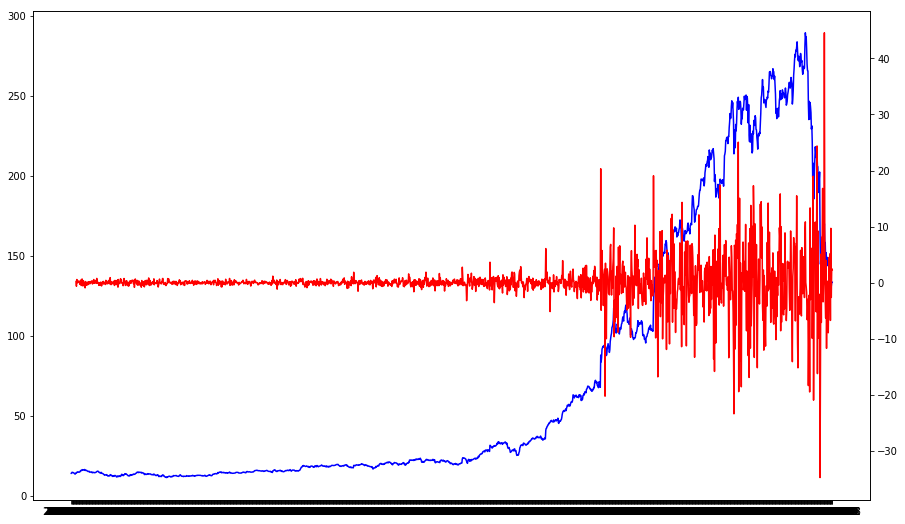

In [6]:
plotuj('MOM', func=lambda x: x.diff())

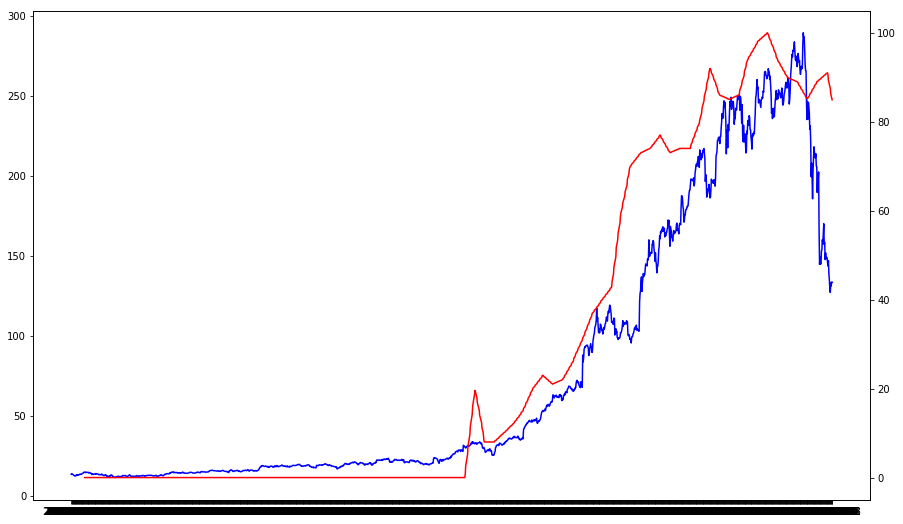

In [13]:
plotuj('TensorFlow_', lag=29)

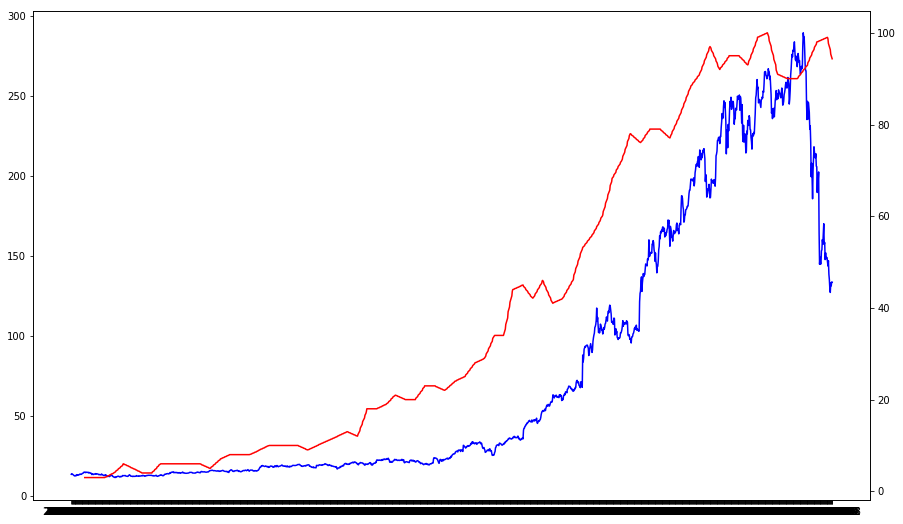

In [14]:
plotuj('deep learning_', lag=29)

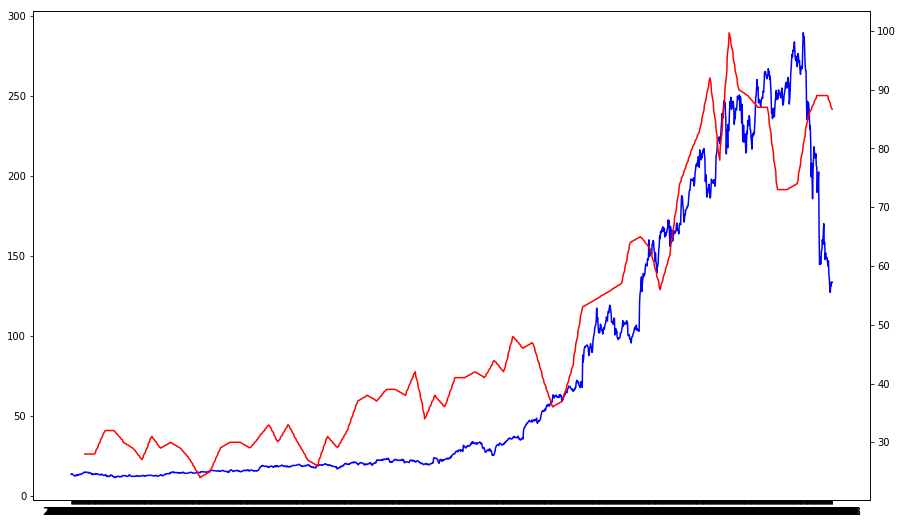

In [15]:
plotuj('Artificial Intelligence_', lag=29)

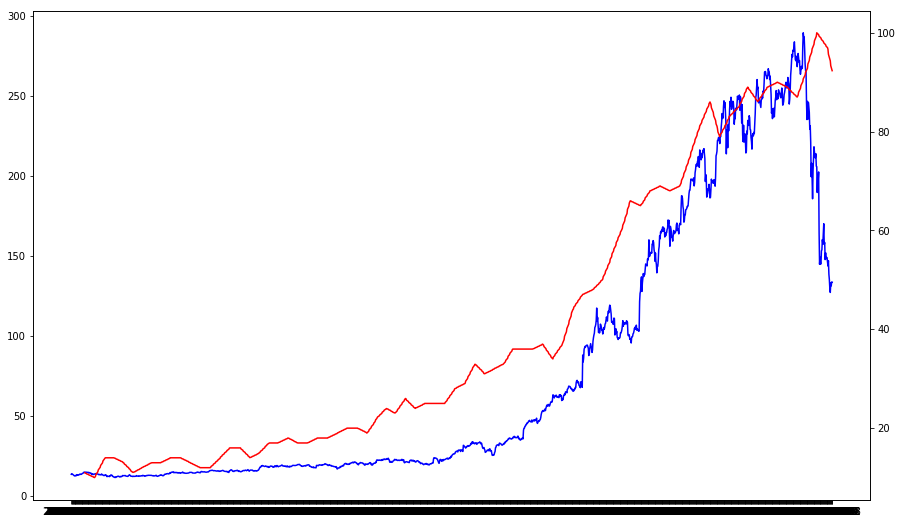

In [16]:
plotuj('Machine Learning_', lag=29)

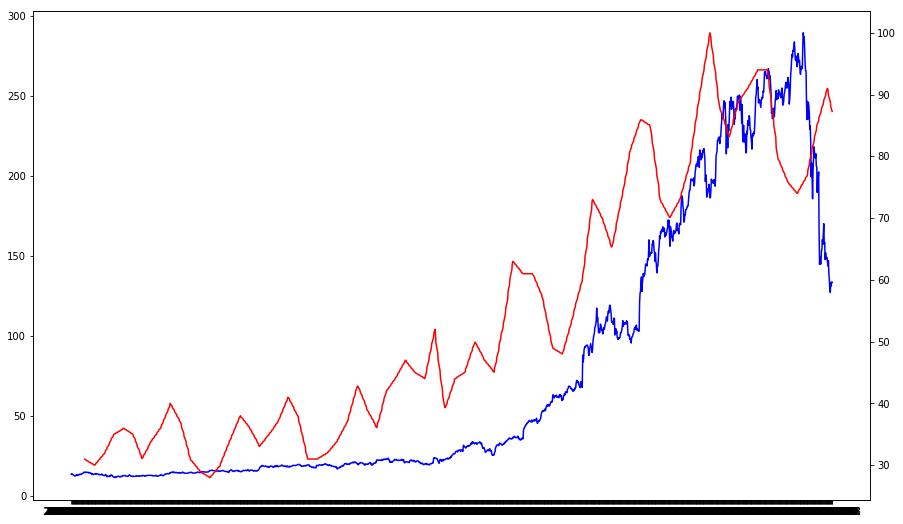

In [17]:
plotuj('neural network_', lag=29)

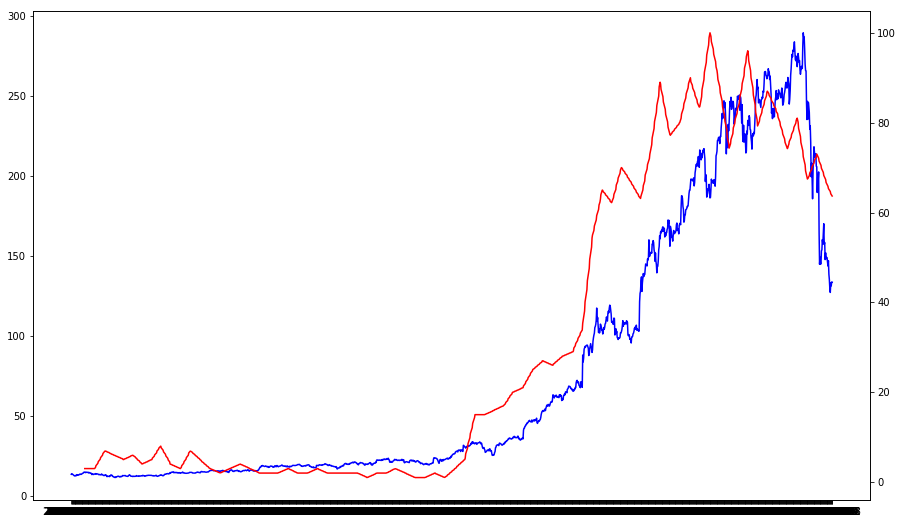

In [18]:
plotuj('MXNet_', lag=29)

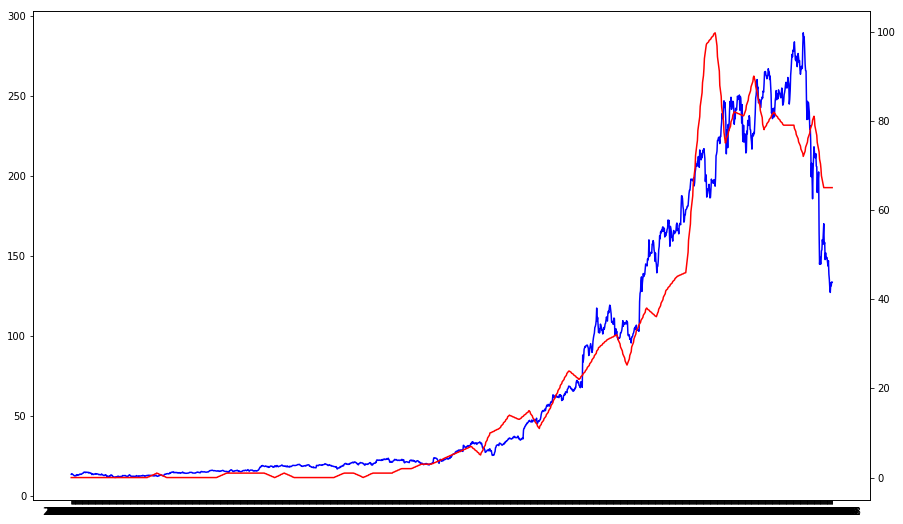

In [19]:
plotuj('blockchain_news', lag=0)

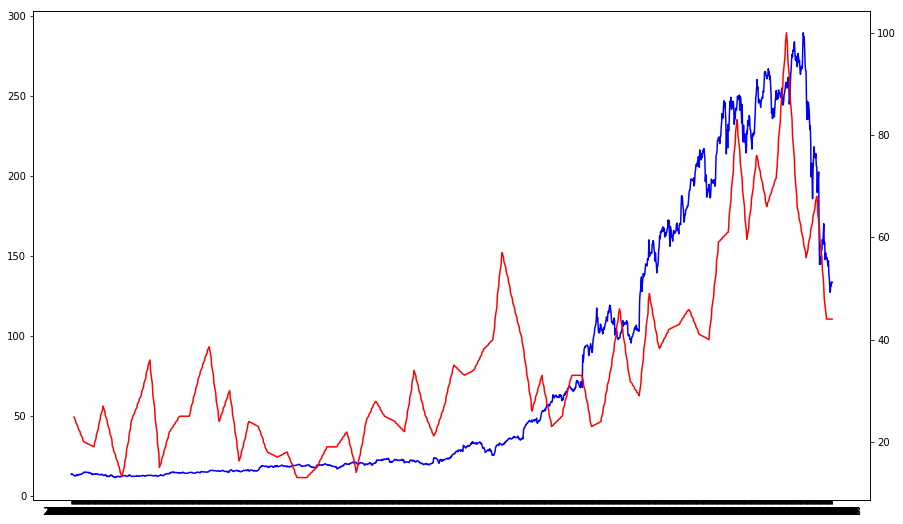

In [20]:
plotuj('GPU_news', lag=6)

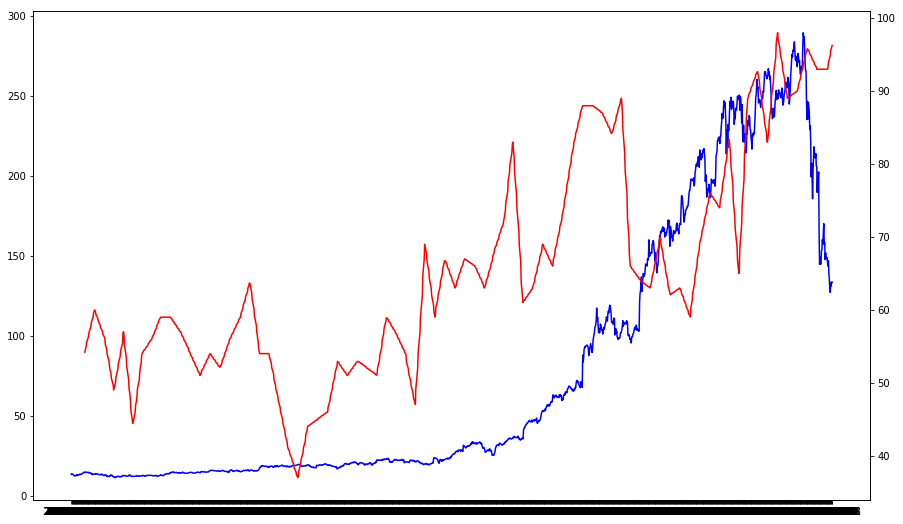

In [21]:
plotuj('gaming_news', lag=29)

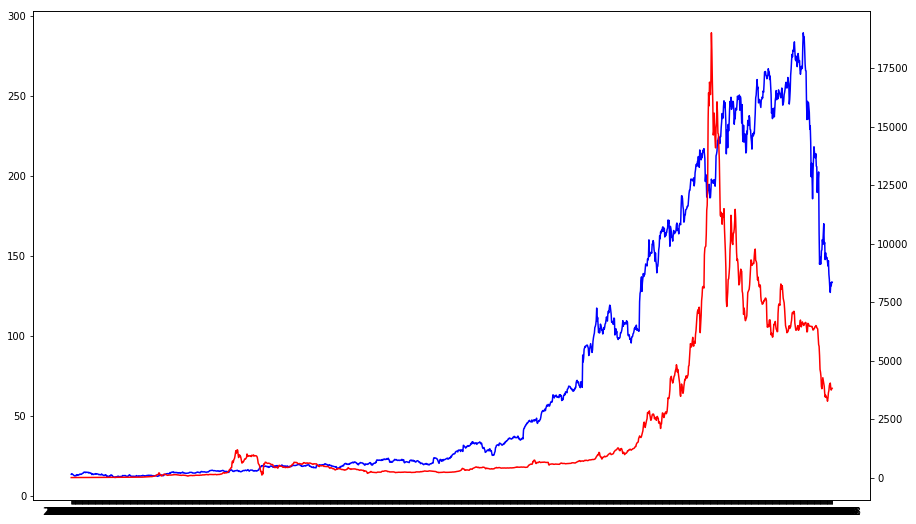

In [22]:
plotuj('BTC', lag=0)

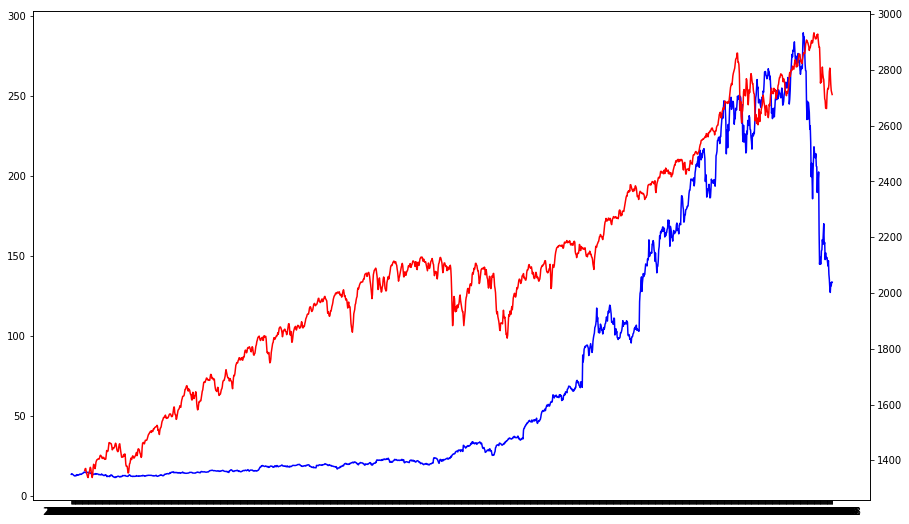

In [23]:
plotuj('SandP', lag=29)

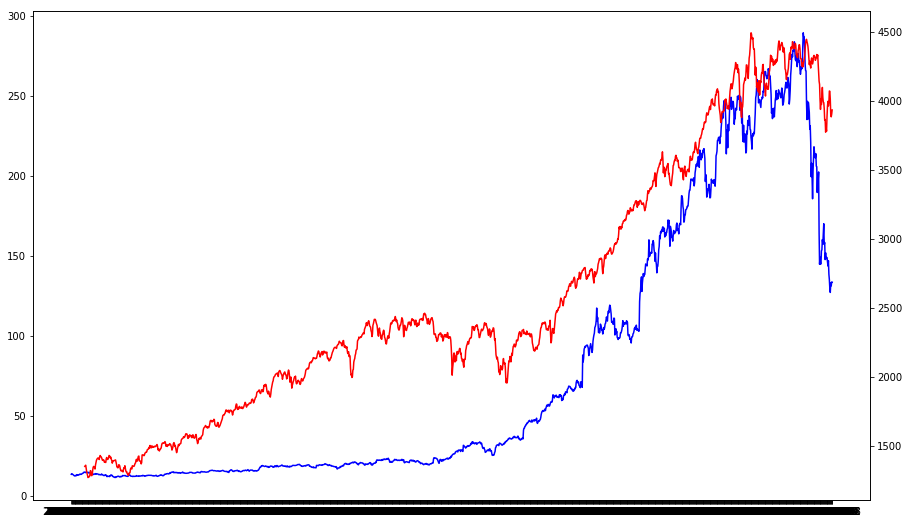

In [24]:
plotuj('NasdaqTech', lag=29)

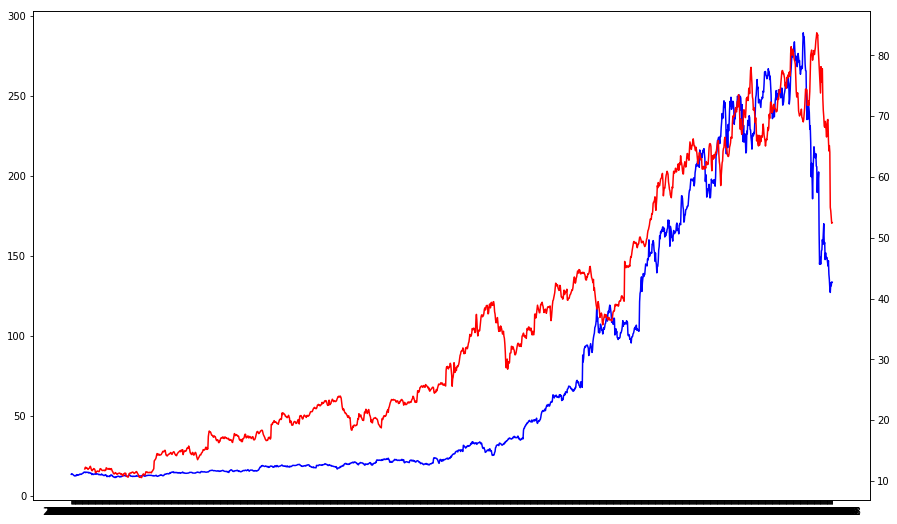

In [25]:
plotuj('ATVI_gaming', lag=29)

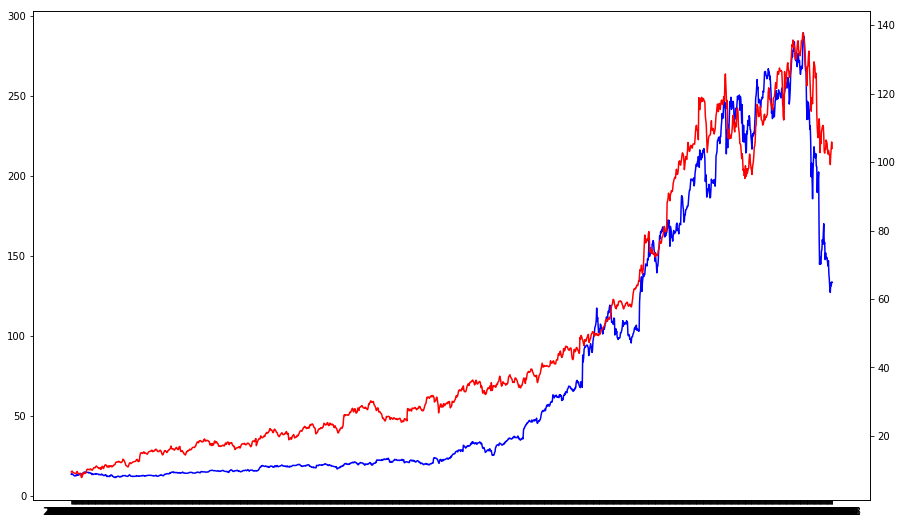

In [26]:
plotuj('TTWO_gaming', lag=0)

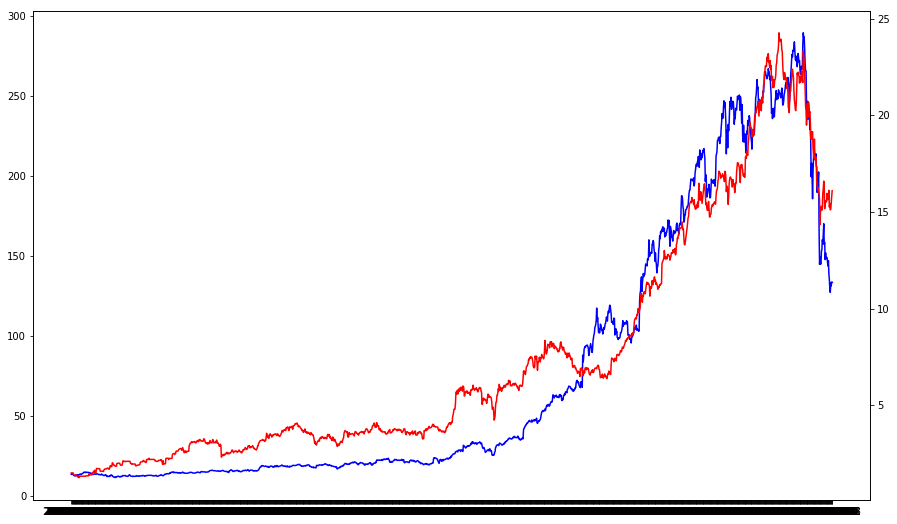

In [27]:
plotuj('UBSFY_gaming', lag=0)

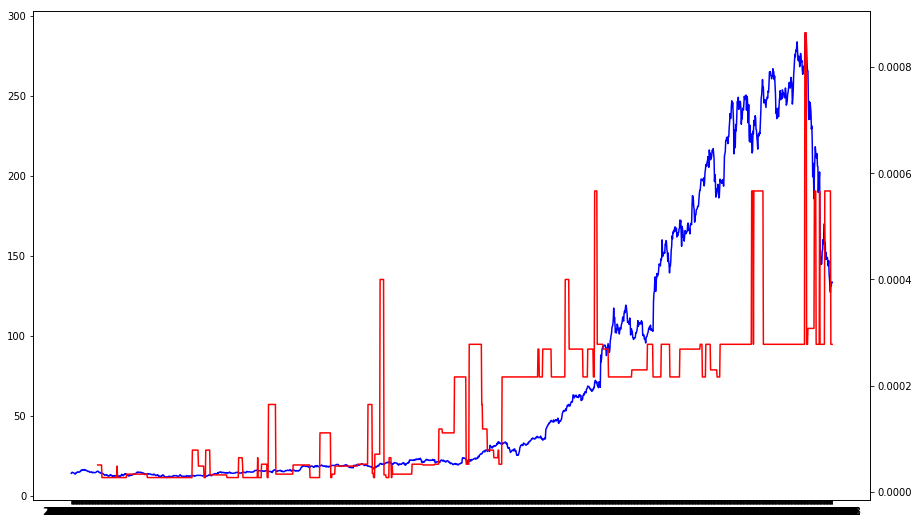

In [59]:
plotuj('fps_transformed_ffill', lag=2)

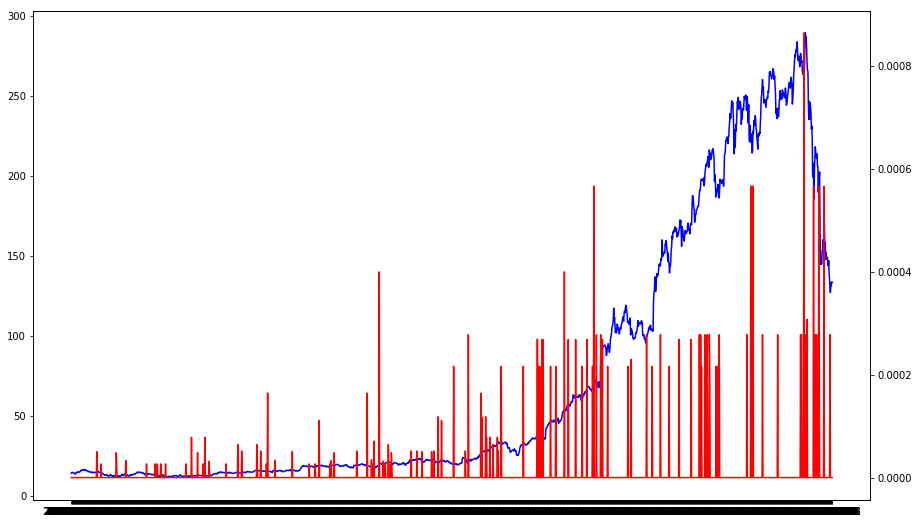

In [60]:
plotuj('fps_transformed_0fill', lag=0)

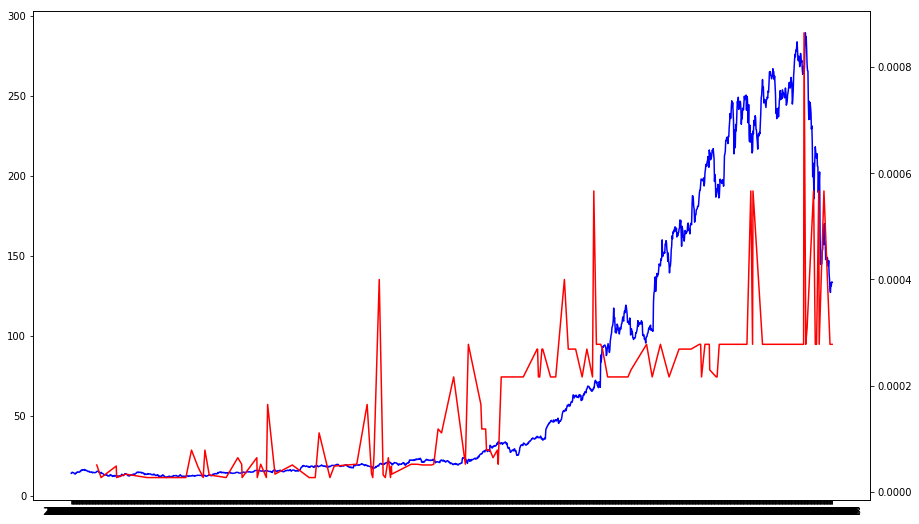

In [63]:
plotuj('fps_transformed_interpolated', lag=0)

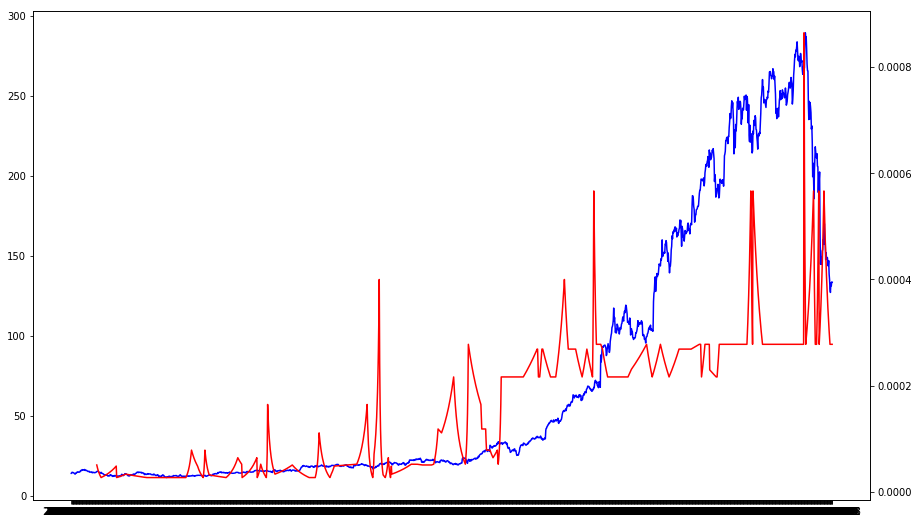

In [65]:
plotuj('fps_interpolated_transformed', lag=0)

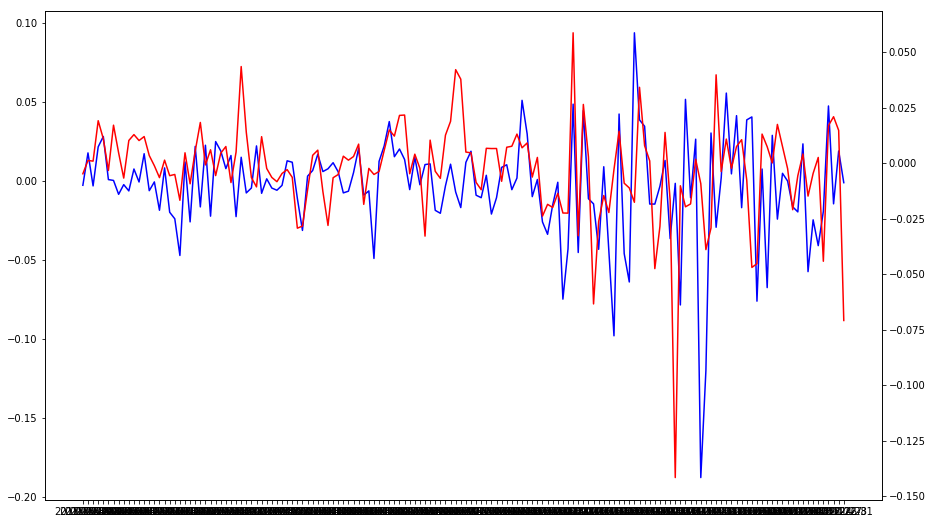

In [29]:
plotujrr('ATVI_gaming_rr', lag=0)

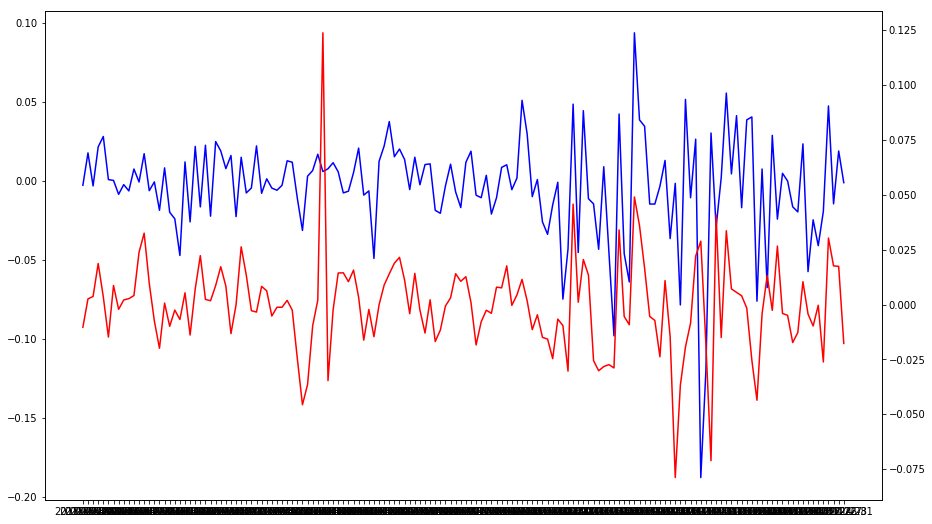

In [30]:
plotujrr('TTWO_gaming_rr')

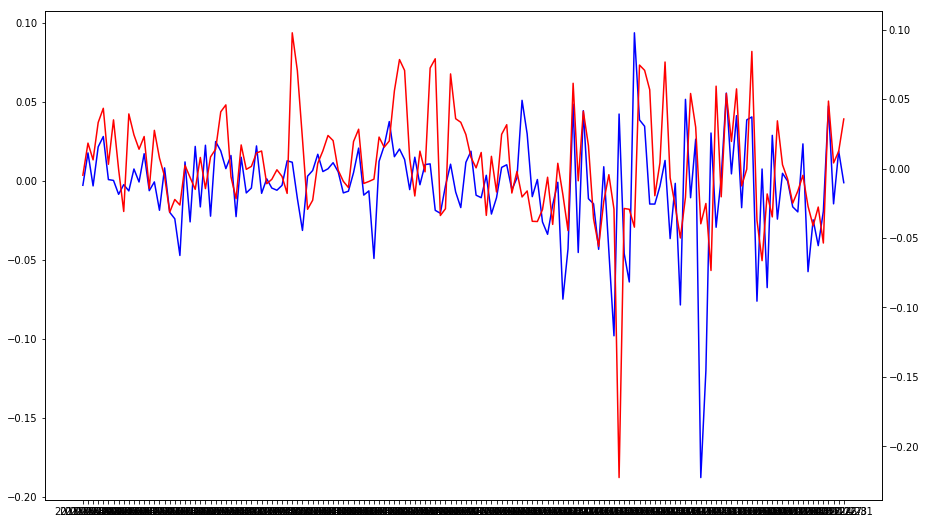

In [31]:
plotujrr('AMD_rr')

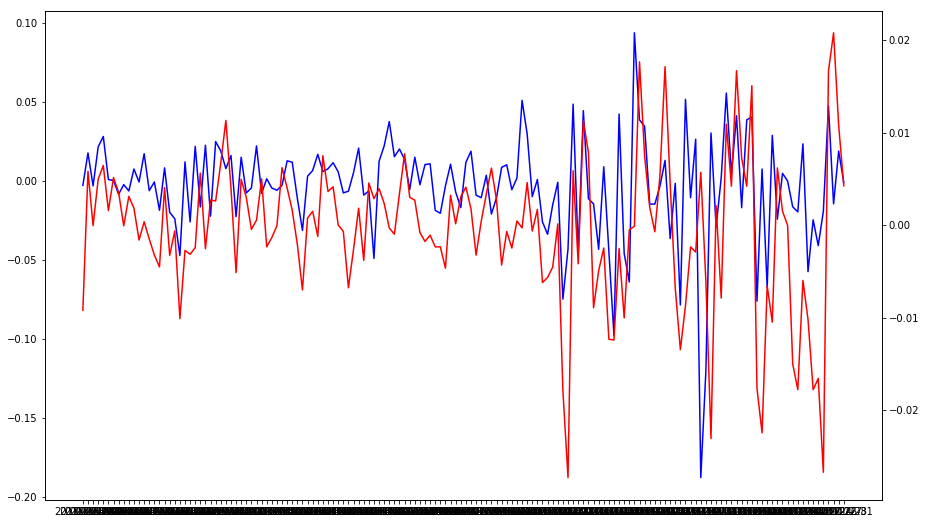

In [32]:
plotujrr('SandP_rr')

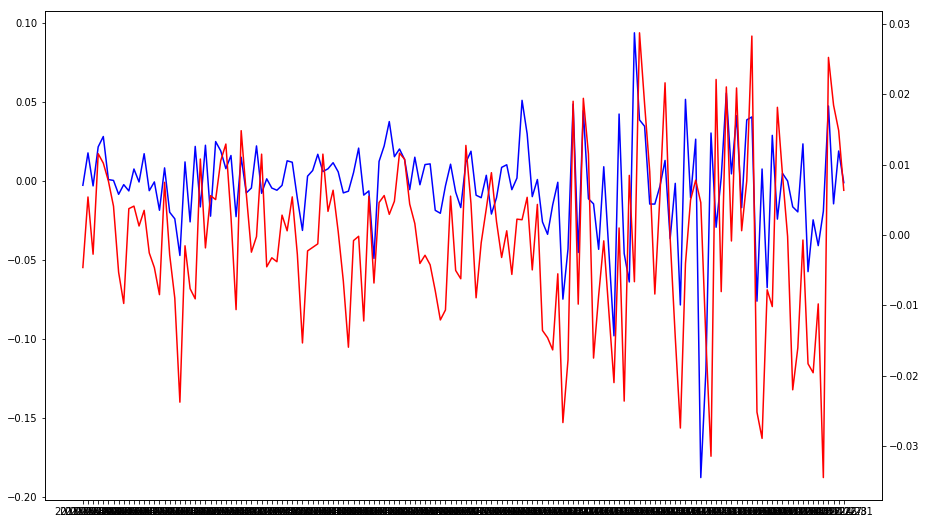

In [33]:
plotujrr('NasdaqTech_rr')